## Step 0: Imports and Reading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Desktop\python_ws\data\movie_netflixrating\Netflix_User_Ratings.csv")

In [3]:
movie_df = pd.read_csv(r"C:\Users\ADMIN\Desktop\python_ws\data\movie_netflixrating\movies.csv")

## Step 1: Understanding Data

- Dataframe shape
- head and tail
- dtypes
- describe

In [4]:
df.shape

(100480507, 4)

In [5]:
movie_df.shape

(17770, 3)

In [6]:
df.head(5)

,CustId,Rating,Date,MovieId
0,1488844,3,2005-09-06,1
1,822109,5,2005-05-13,1
2,885013,4,2005-10-19,1
3,30878,4,2005-12-26,1
4,823519,3,2004-05-03,1


In [7]:
movie_df.head()

,MovieId,ReleaseYear,MovieTitle
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100480507 entries, 0 to 100480506
Data columns (total 4 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   CustId   int64 
 1   Rating   int64 
 2   Date     object
 3   MovieId  int64 
dtypes: int64(3), object(1)
memory usage: 3.0+ GB


In [9]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17770 entries, 0 to 17769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MovieId      17770 non-null  int64  
 1   ReleaseYear  17763 non-null  float64
 2   MovieTitle   17770 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 416.6+ KB


## Step 2: Preparing Data
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation

In [10]:
df.isna().sum()

CustId     0
Rating     0
Date       0
MovieId    0
dtype: int64

In [11]:

df.duplicated(keep=False).sum()

0

In [12]:
movie_df.duplicated(keep=False).sum()

0

In [13]:
df.Date = pd.to_datetime(df.Date)

In [14]:
df3 = pd.merge(df,movie_df,how = 'left', on = 'MovieId')

In [15]:
df3.head()

,CustId,Rating,Date,MovieId,ReleaseYear,MovieTitle
0,1488844,3,2005-09-06,1,2003.0,Dinosaur Planet
1,822109,5,2005-05-13,1,2003.0,Dinosaur Planet
2,885013,4,2005-10-19,1,2003.0,Dinosaur Planet
3,30878,4,2005-12-26,1,2003.0,Dinosaur Planet
4,823519,3,2004-05-03,1,2003.0,Dinosaur Planet


In [16]:
df3.shape

(100480507, 6)

## Step 3: Feature Understanding 
(Univariate analysis)
- Plotting Feature Distributions
    - Histogram
    - KDE
    - Plot

<Axes: ylabel='Frequency'>

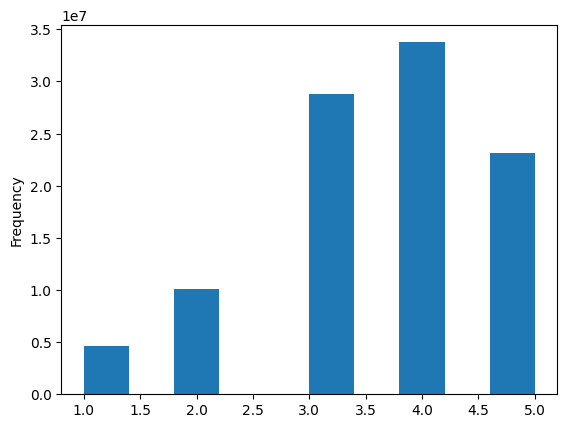

In [18]:
df3.Rating.plot(kind='hist')

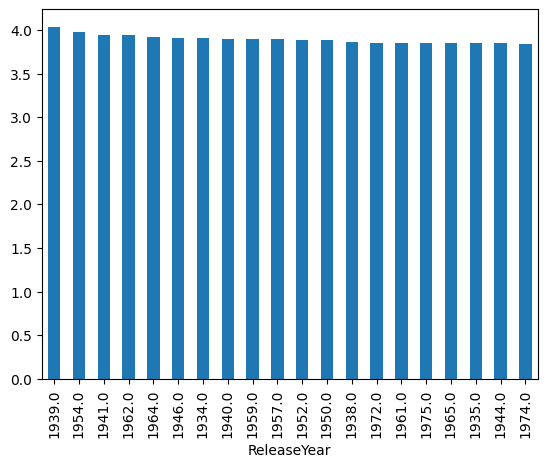

In [19]:
avg_rating_by_year = df3.groupby('ReleaseYear').Rating.mean().sort_values(ascending=False).head(20).plot(
    kind='bar'
)

Interestingly, those movies in the early years get the highest rating out of viewers, although they may not have the highest view counts.

In [50]:
df3.ReleaseYear.value_counts().sort_values(ascending=False).head(20)

ReleaseYear
2004.0    10456339
2003.0     9576604
2002.0     8640932
2001.0     7241888
2000.0     6599655
1999.0     5630324
1998.0     4381315
1997.0     3688435
1995.0     3328639
1996.0     3321619
1994.0     2865492
1993.0     2622986
1992.0     2344290
1989.0     2061596
1987.0     2039540
1990.0     2031924
2005.0     1983802
1988.0     1796449
1991.0     1718330
1984.0     1475720
Name: count, dtype: int64

#### Observations:

We can see that movies from 1996 to 2004 are the most watched. It is quite interesting since it's in the lastest years of the 20th century and the early 21st century. We perhaps can analyse only the movies from these years.

Maybe this is the golden era of the movies making industry? 

We can narrow down the year scope from 1990 to 2005 (since latest year in Dataset is 2005)

One reason why the view counts of the movies in the past are so low may be because there weren't a lot of movies to choose and also Netflix doesn't have a lot of movies in those years. Furthermore, movies are produced in much larger quantity in later years than the early days.  Also, the viewers are exposed more to modern movies, which were created in 1990 - 2005.

Hence, we shall look into the movies only from 1990 to 2005.

The older movies get a different analysis of their own.

In [17]:
md_df =df3.loc[
    (df3.ReleaseYear > 1990) &
    (df3.ReleaseYear <2010)
]

In [18]:
md_df.shape

(74400650, 6)

Let's see the View count and mean of each movie.

In [69]:
df4.groupby('MovieTitle').Rating.agg(['mean','count']) \
    .sort_values('mean',ascending=False) \
    .head(20)

,mean,count
MovieTitle,,
Lord of the Rings: The Return of the King: Extended Edition,4.723270,73335
The Lord of the Rings: The Fellowship of the Ring: Extended Edition,4.716611,73422
Lord of the Rings: The Two Towers: Extended Edition,4.702611,74912
Lost: Season 1,4.670989,7249
Battlestar Galactica: Season 1,4.638809,1747
Fullmetal Alchemist,4.605021,1633
Trailer Park Boys: Season 4,4.600000,25
Trailer Park Boys: Season 3,4.600000,75
Tenchi Muyo! Ryo Ohki,4.595506,89


#### Observations:

We can see that there are some movies with low view rate but still gets high rating. Perhaps we should categorise movies in to view count bins, where movies with counts: less than 1k, 1k to 10k, 10k to 100k, and more than 100k.

We will also calculate the average rating of each movie.

In [19]:
a = pd.DataFrame(md_df.groupby('MovieTitle').Rating.agg(['mean','count']).sort_values('count',ascending=False))


In [20]:
a.head()

,mean,count
MovieTitle,,
Miss Congeniality,3.361267,232944
Independence Day,3.724238,216596
The Patriot,3.747955,211764
The Day After Tomorrow,3.442166,196397
Pirates of the Caribbean: The Curse of the Black Pearl,4.153908,193941


In [21]:
a.rename(columns = {'mean:':'mean_rating','count':'view_count'},inplace=True)

In [22]:
a.head()

,mean,view_count
MovieTitle,,
Miss Congeniality,3.361267,232944
Independence Day,3.724238,216596
The Patriot,3.747955,211764
The Day After Tomorrow,3.442166,196397
Pirates of the Caribbean: The Curse of the Black Pearl,4.153908,193941


In [23]:
md_df = md_df.merge(a,how = 'left', on = 'MovieTitle')

In [24]:
md_df.head()

,CustId,Rating,Date,MovieId,ReleaseYear,MovieTitle,mean,view_count
0,1488844,3,2005-09-06,1,2003.0,Dinosaur Planet,3.749543,547
1,822109,5,2005-05-13,1,2003.0,Dinosaur Planet,3.749543,547
2,885013,4,2005-10-19,1,2003.0,Dinosaur Planet,3.749543,547
3,30878,4,2005-12-26,1,2003.0,Dinosaur Planet,3.749543,547
4,823519,3,2004-05-03,1,2003.0,Dinosaur Planet,3.749543,547


In [25]:
md_df.rename(columns = {'mean':'mean_rating'},inplace=True)

### Let's check the case where one user watch a movie multiple times

In [26]:
md_df.duplicated(subset=['CustId','MovieTitle'],keep=False).sum()

122810

#### Observations:

There are a lot of cases where the same Customer id watch one movie multiple times with different ratings.

I believe each of the various ratings that one same person gives a movie should reflect different movie experiences that he perceives. Therefore, the average rating of a movie should also include the multiple ratings from the same person.

However, there might be cases where counting these multiple ratings from one same person could result in biased result. For example, one person or a fandom club may spam watching their favorite movies and always give 5 stars. Hence, I will calculate another adjusted rating using only the latest rating one CustID for a movie.

In [27]:
md_df2 = md_df.sort_values('Date',ascending=False)

In [28]:
md_df2.drop_duplicates(subset=['CustId','MovieTitle'], keep='first',inplace=True)

In [29]:
md_df2.head()

,CustId,Rating,Date,MovieId,ReleaseYear,MovieTitle,mean_rating,view_count
13561890,2119509,2,2005-12-31,3427,2002.0,Men in Black II,3.334731,136850
42392284,951152,5,2005-12-31,10644,2002.0,The West Wing: Season 4,4.452753,5122
49948647,2630966,5,2005-12-31,12423,1993.0,Dr. Quinn Medicine Woman: Season 1,3.603719,1721
49948570,2316429,3,2005-12-31,12423,1993.0,Dr. Quinn Medicine Woman: Season 1,3.603719,1721
7861061,930958,2,2005-12-31,2008,2005.0,Hercules,3.638662,19580


In [30]:
md_df.shape

(74400650, 8)

In [33]:
b = pd.DataFrame(md_df2.groupby('MovieTitle').Rating.mean())

In [35]:
b.rename(columns = {'Rating':'adjusted_mean_rating'},inplace=True)

In [36]:
b.head()

,adjusted_mean_rating
MovieTitle,
'N Sync: 'N the Mix,2.655936
'N Sync: Live at Madison Square Garden,2.890884
'N Sync: Making of the Tour,2.782016
'N Sync: PopOdyssey Live,3.413043
'N Sync: Unauthorized Biography,2.208955


In [44]:
md_df = md_df.merge(b,how = 'left', on= 'MovieTitle')

MemoryError: Unable to allocate 568. MiB for an array with shape (74400650,) and data type int64

In [42]:
md_df.head()

,CustId,Rating,Date,MovieId,ReleaseYear,MovieTitle,mean_rating,view_count
0,1488844,3,2005-09-06,1,2003.0,Dinosaur Planet,3.749543,547
1,822109,5,2005-05-13,1,2003.0,Dinosaur Planet,3.749543,547
2,885013,4,2005-10-19,1,2003.0,Dinosaur Planet,3.749543,547
3,30878,4,2005-12-26,1,2003.0,Dinosaur Planet,3.749543,547
4,823519,3,2004-05-03,1,2003.0,Dinosaur Planet,3.749543,547


In [ ]:
md_df.to_csv('out.csv')